<a href="https://colab.research.google.com/github/hen-mi/IA/blob/main/atividade01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

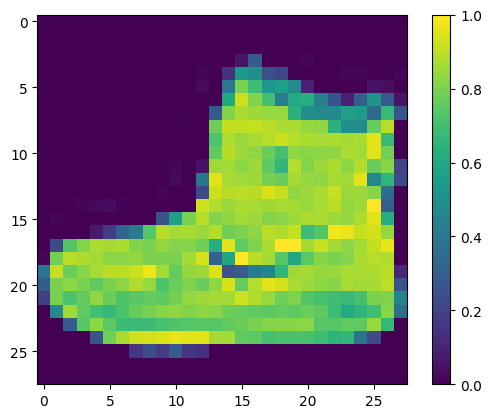

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

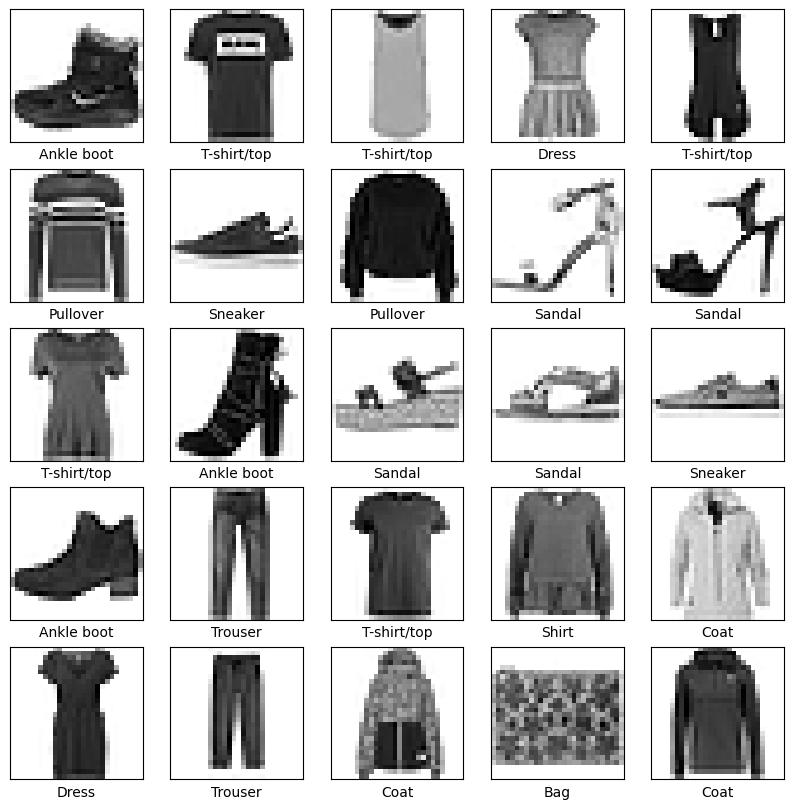

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #primeira camada
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.0998
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3016 - accuracy: 0.1116
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2962 - accuracy: 0.1505
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2817 - accuracy: 0.2110
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2563 - accuracy: 0.2383
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2222 - accuracy: 0.2655
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1824 - accuracy: 0.2577
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1391 - accuracy: 0.2817
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0938 - accuracy: 0.2994
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.048

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.4160 - accuracy: 0.4914 - 613ms/epoch - 2ms/step

Test accuracy: 0.49140000343322754


In [ ]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])



313/313 [==============================] - 1s 2ms/step


7

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

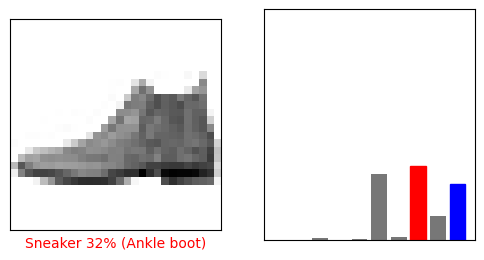

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

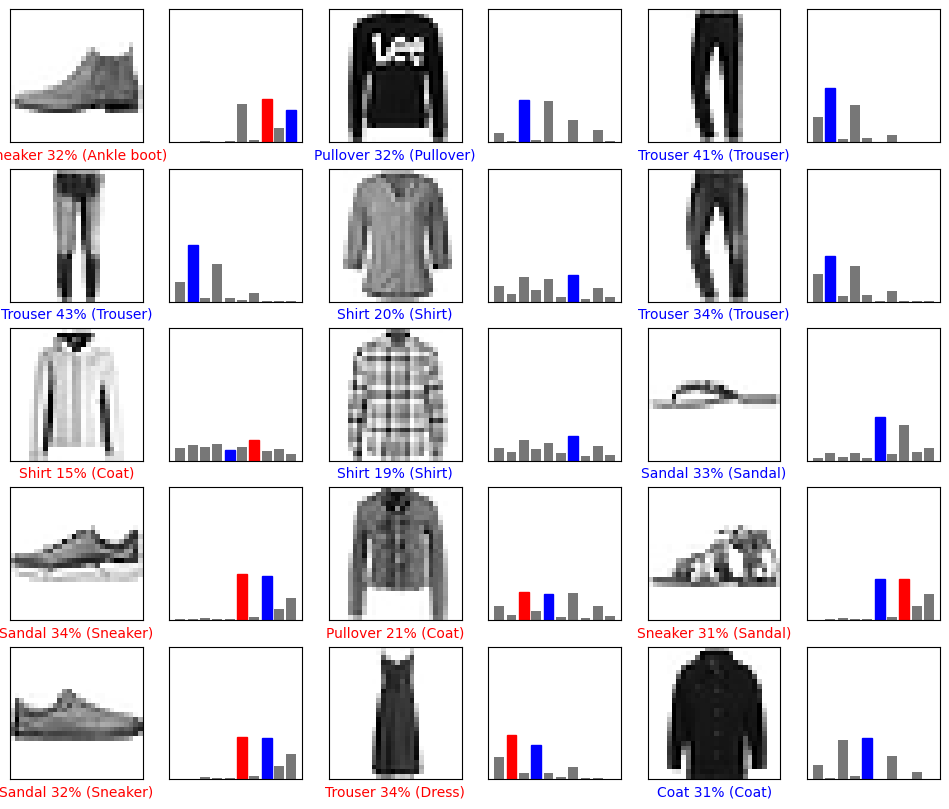

In [ ]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:

img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 28, 28)


1/1 [==============================] - 0s 21ms/step
[[0.00171419 0.00184626 0.01126019 0.00284669 0.00641742 0.2889422
  0.0145143  0.32352343 0.10651421 0.24242114]]


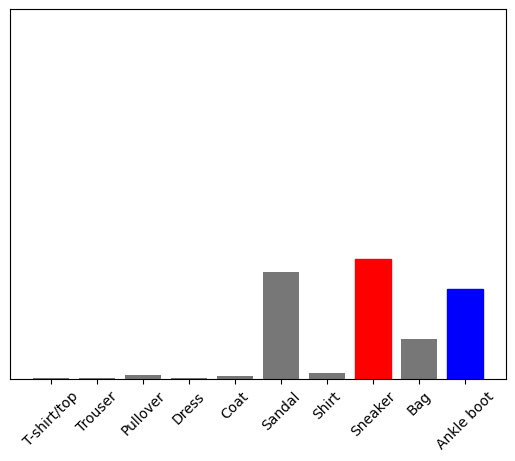

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

7